<a href="https://colab.research.google.com/github/CodeBrk3R/Webscraping/blob/master/portfolio_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HIT PLAY Button below to use each section.**

In [ ]:
#@title get app libraries
from google.colab import files
import pandas as pd
import requests
from datetime import datetime
from matplotlib import pyplot as plt
import bs4
import time
try:
  import yfinance as yf
  from googlesearch import search
except:
  !pip install google
  !pip install yfinance
  print('----------------------------------------\n')
  import yfinance as yf
  from googlesearch import search
import numpy as np
 
 
def stock_pairplot(stock):
  ticker = yf.Ticker(stock)
  df = ticker.history(period=f"1y")
  x = df.index
  y = df['Close']
  z = df['Volume']
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(8)
  fig.set_figwidth(18)
  fig.suptitle('Performance vs Volume')
  ax1.plot(x, y)
  ax2.plot(x, z)
 
today = datetime.today()
year = str(today.year)
 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
 
 
def get_stocklist():
  stonks = input("type all the tickers you want 1yr projections for separated by a space(example: tsla aapl msft....)\n")
  print('\n')
  stonks = stonks.split(" ")
  return stonks
 
def get_future(x):
  url = f'https://money.cnn.com/quote/forecast/forecast.html?symb={x}'
  response = requests.get(url)
  html = response.content
  soup = bs4.BeautifulSoup(html, "html.parser")
  all_results=soup.find_all("span")
  if 'Buy' in all_results[15]:
    result = all_results[14].text
    return result
  elif 'Hold' in all_results[15]:
    result = all_results[14].text
    return result
  else:
    result = all_results[15].text
    return result
 
def stonks_futures(stonks):
  for item in stonks:
    try:
      fore = get_future(item)
      print(f"{item}'s 1yr projection: {fore}")
      time.sleep(1)
    except:
      print(f"{item}'s 1yr projection Not Found")
      continue
 
def get_stock(x,y=year):
  y=int(y)
  y1=y-1
  y2=y
  df = yf.download(x, 
  start=f'{y1}-01-01', 
  end=f'{y2}-12-31', 
  progress=False)
  return df
 
def base_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Close'].plot(title=f"{x}\'s stock price",figsize = (18,6),label=x)
  return plot,plt.legend()
 
def tick_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Close'].plot(title=f"{x}\'s stock price",figsize = (18,6))
  df['MA20'] = df['Close'].rolling(20).mean()
  plot20 = df['MA20'].plot(label='MA20')
  df['MA50'] = df['Close'].rolling(50).mean()
  plot50 = df['MA50'].plot(label='MA50')
  return plot,plot20,plot50,plt.legend()
 
def Vol_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Volume'].plot(title=f"{x}\'s stock Volume",figsize = (18,6))
  return plot,plt.legend()
 
def tick_status(x,y=year):
  y=str(y)
  ticker = yf.Ticker(x)
  ticker.recommendations.reset_index(inplace = True)
  indexx = [str(item[:10]) for item in ticker.recommendations['Date'].astype('str')]
  ticker.recommendations['Date']= indexx
  ticker.recommendations.set_index('Date',inplace=True)
  df = get_stock(x,y)
  result = df.join(ticker.recommendations)
  result.fillna('none',inplace=True,axis=1)
  answer = result[result['Firm'] != 'none']
  return answer[['Close','Volume','Firm','To Grade', 'From Grade']]
 
 
def get_news(x):
  news = [j for j in search(f'{x} stock news', tld="co.in", num=15, stop=15, pause=2)]
  return news
 
def forcast(x):
  cnn_fc = f'https://money.cnn.com/quote/forecast/forecast.html?symb={x}'
  tr_fc = f'https://www.tipranks.com/stocks/{x}/forecast'
  return print(f'{x}\'s Forcast: ','\n',tr_fc,'\n',cnn_fc)
 
def percent_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  df['returns'] = (df['Close']/ df['Close'].shift(1))-1
  return df['returns'].plot(label=x,figsize = (18,6)),plt.legend()
 
def percent_ch(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  df['returns'] = (df['Close']/ df['Close'].shift(1))-1
  return df
 
def return_500(x):
  data = percent_plot(x)
  data2 = percent_plot('voo')
  return data,data2,plt.legend()
 
def compare_500(x):
  data = base_plot(x)
  data2 = base_plot('voo')
  return data,data2,plt.legend()
 
def best_day(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  day = str(df['Volume'].idxmax())[:10]
  news = [j for j in search(f'{x} stock news {day} ', tld="co.in", num=5, stop=5, pause=2)]
  return day,news
 
def best_plot(x):
  df=get_stock(x)
  data = df['Volume'].iloc[df['Volume'].argmax()-50:df['Volume'].argmax()+50].plot(title=f'{x} best gains',figsize=(18,6))
  return data
 
def compare_2stocks(x,y):
  data = base_plot(x)
  data2 = base_plot(y)
  return data,data2,plt.legend()
 
def get_price(x):
  price = get_stock(x,y)['Close'].round(2).iloc[-1]
  return price
 
def div_yield(x):
  try:
    div = (yf.Ticker(x).dividends[-1]*4/get_price(x))*100
    div = div.round(2)
    return div
  except:
    return '0'
 
def analyze_list(x):
  dictt={}
  for item in x:
    try:
      dictt[item] = get_future(item)
    except:
      dictt[item] = 'NA'
      continue
  data = pd.DataFrame(dictt.items(),columns=['ticker','1yr future'])
  data['div_yield'] = [div_yield(x) for x in data['ticker']]
  data['future%'] = [x[:-1] for x in data['1yr future'].astype(str)]
  data['future%'] = pd.to_numeric(data['future%'], downcast="float")
  data.drop(['1yr future'],axis=1,inplace=True)
  data['div_yield'] = pd.to_numeric(data['div_yield'], downcast="float")
  data['potential yield%'] = data['div_yield'] + data['future%']
  data['potential yield%'] = data['potential yield%'].round(2)
  data['current_price'] = [get_stock(x,y)['Close'].round(2).iloc[-1] for x in data['ticker']]
  data['target price'] = data['potential yield%']*.01*data['current_price']+data['current_price']
  data = data.sort_values(['potential yield%'],ascending = 0)
  recomendations=[]
  for item in data['potential yield%']:
    if item > 12:
      recomendations.append('BUY')
    elif 3 < item < 12:
      recomendations.append('hold')
    else:
      recomendations.append('SELL')
  data['recomendations'] = recomendations
  return data
 
def get_sector(x):
  url = f'https://money.cnn.com/quote/profile/profile.html?symb={x}'
  try:  
    response = requests.get(url)
    html = response.content
    soup = bs4.BeautifulSoup(html, "html.parser")
    all_results=soup.find_all("td")
    result = all_results[9].get_text()[6:]
  except:
    return 'NA'
  return result
 
def get_industry(x):
  url = f'https://money.cnn.com/quote/profile/profile.html?symb={x}'
  try:  
    response = requests.get(url)
    html = response.content
    soup = bs4.BeautifulSoup(html, "html.parser")
    all_results=soup.find_all("td")
    result = all_results[10].get_text()[8:]
  except:
    return 'NA'
  return result
 
def current_grade(x):
  result = tick_status(x,y)
  result2 = result.iloc[-1]['To Grade']
  return result2
 
def check_cross(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  df['MA20'] = df['Close'].rolling(20).mean()
  df['MA50'] = df['Close'].rolling(50).mean()
  data = df[['MA20','MA50']].tail(5).copy()
  if (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 1).bool() & (data.iloc[-1]['MA20'] > data.iloc[-2]['MA20']):
    print('20 day crossed: UP')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 2).bool() & (data.iloc[-1]['MA20'] < data.iloc[-2]['MA20']):
    print('close to downward cross')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) > 2).bool() & (data.iloc[-1]['MA20'] > data.iloc[-2]['MA20']):
    print('20 day: steady UP Trend')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 1).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('50 day crossed: DOWN')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 2).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('close to upward cross')
  elif (abs(data.tail(1)['MA50'] - data.tail(1)['MA20']) > 2).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('50 day: steady Down Trend')
  else:
    print('NA')
 
def get_signal(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  df['MA20'] = df['Close'].rolling(20).mean()
  df['MA50'] = df['Close'].rolling(50).mean()
  data = df[['MA20','MA50']].tail(300).copy()
  data['signal'] = 0.0
  data['signal'] = np.where(data['MA20'] > data['MA50'],1.0,0.0)
  data['pos'] = data['signal'].diff()
  data.loc[(data.pos == 1),'trade']='buy'
  data.loc[(data.pos == -1),'trade']='sell'
  check = data['trade']=='buy'
  check1 = data['trade']=='sell'
  if len(data[check1 | check]) >0 :
    return data[check1 | check]
 
def last_signal(x):
  ans = get_signal(x)
  if len(ans) >0:
    result = str(ans.tail(1).index[0])[:10],get_signal(x).tail(1)['trade'][0]
    return result
 
def get_curve():
  url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'
  response = requests.get(url)
  html = response.content
  soup = bs4.BeautifulSoup(html, "html.parser")
  all_results=soup.find_all("th")
  tr =soup.find_all('tr')
  YC=[]
  cols = tr[1].text.split()[1:]
  indexx = []
 
  for item2 in tr[2:]:
    if (item2.text.startswith('0') or item2.text.startswith('1')):
      iitem2 = item2.text[:8]
      indexx.append(iitem2)
      iitem1 = item2.text[8:]
      a_string = iitem1
      n = 4
      split_strings = [float(a_string[index : index + n]) for index in range(0, len(a_string), n)]
      YC.append(split_strings)
    
  yeild_curve = pd.DataFrame(columns=cols,data=YC,index=indexx)
  yeild_curve = yeild_curve.drop('mo2', 1)
  yeild_curve.columns = 'mo2    mo3 mo6 mo1 yr2 yr3 yr5 yr7 yr10    yr20    yr30'.split()
  return yeild_curve
 
y = year

In [ ]:
#@title my portfolio trade signals list!
stocks = ['csco','dis','sbux','o','adp','c','nrz','msft','jpm','bac','jnj','aapl','pypl','crwd','gm','tsm','amd','amzn','crm','znga','wmt','f','gm','mcd','ko','tgt','cmg']
data = [[last_signal(item)[0],last_signal(item)[1],item]  for item in stocks]
data.sort()
data

[['2020-11-25', 'buy', 'csco'],
 ['2021-03-01', 'buy', 'adp'],
 ['2021-03-15', 'buy', 'mcd'],
 ['2021-04-01', 'buy', 'tgt'],
 ['2021-06-08', 'buy', 'crm'],
 ['2021-06-16', 'buy', 'amd'],
 ['2021-06-17', 'buy', 'msft'],
 ['2021-06-28', 'buy', 'aapl'],
 ['2021-06-30', 'buy', 'cmg'],
 ['2021-07-15', 'buy', 'o'],
 ['2021-07-15', 'sell', 'gm'],
 ['2021-07-15', 'sell', 'gm'],
 ['2021-07-20', 'buy', 'ko'],
 ['2021-07-21', 'buy', 'jnj'],
 ['2021-07-22', 'buy', 'wmt'],
 ['2021-07-26', 'sell', 'f'],
 ['2021-07-30', 'sell', 'znga'],
 ['2021-08-06', 'sell', 'tsm'],
 ['2021-08-13', 'sell', 'amzn'],
 ['2021-08-16', 'sell', 'pypl'],
 ['2021-08-17', 'buy', 'jpm'],
 ['2021-08-18', 'buy', 'c'],
 ['2021-08-20', 'sell', 'crwd'],
 ['2021-08-23', 'buy', 'bac'],
 ['2021-08-27', 'sell', 'sbux'],
 ['2021-08-30', 'buy', 'nrz'],
 ['2021-08-31', 'buy', 'dis']]

In [ ]:
#@title ETF CURRENT SIGNALS!
stocks = ['voo','vfh','vug','vti','qqq','vgt','vnq','mchi']
data = [[last_signal(item)[0],last_signal(item)[1],item]  for item in stocks]
data.sort()
data

[['2020-11-10', 'buy', 'voo'],
 ['2020-11-10', 'buy', 'vti'],
 ['2021-01-22', 'buy', 'vnq'],
 ['2021-06-16', 'buy', 'qqq'],
 ['2021-06-16', 'buy', 'vug'],
 ['2021-06-17', 'buy', 'vgt'],
 ['2021-07-08', 'sell', 'mchi'],
 ['2021-08-12', 'buy', 'vfh']]

In [ ]:
#@title Get a stocks trade signals!
x = input("what ticker symbol to check for trade signals?\n")
print(x,' signals!','\n')
get_signal(x)

what ticker symbol to check for trade signals?
sbux
sbux  signals! 



,MA20,MA50,signal,pos,trade
Date,,,,,
2020-11-06,87.502768,85.824201,1.0,1.0,buy
2021-02-08,101.245708,101.274064,0.0,-1.0,sell
2021-02-17,102.099553,102.095364,1.0,1.0,buy
2021-02-18,102.097424,102.157348,0.0,-1.0,sell
2021-02-26,102.711446,102.361857,1.0,1.0,buy
2021-06-01,111.869162,112.025814,0.0,-1.0,sell
2021-07-08,112.290662,112.092436,1.0,1.0,buy
2021-08-27,116.497018,116.618438,0.0,-1.0,sell


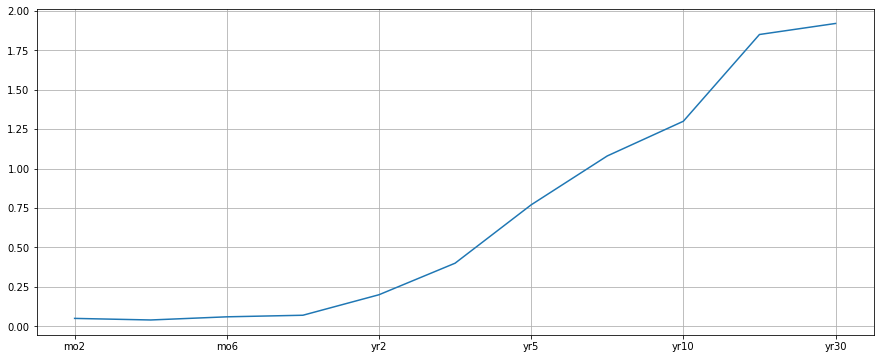

In [ ]:
#@title YIELD CURVE
data = get_curve()
curve = data.iloc[-1].plot.line(figsize=(15,6),grid=True)
curve

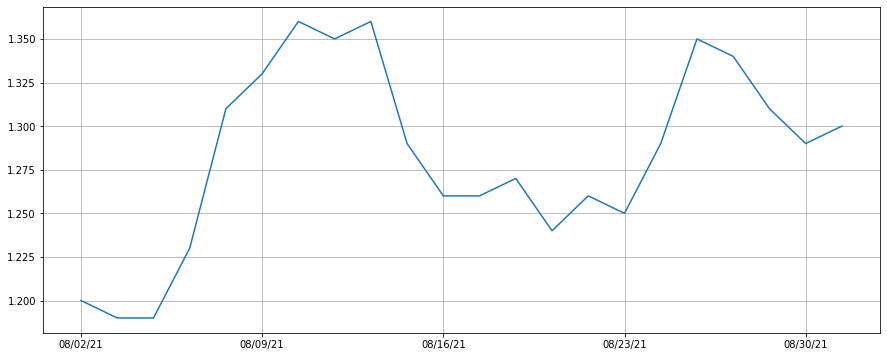

In [ ]:
#@title 10 year yield
ten_yr = data['yr10'].plot.line(figsize=(15,6),grid=True)
ten_yr


## **ANALYZE Motley fool dividend STOCK LIST**


In [ ]:
#@title Start analysis!
stocks = '''MMM
jpm
tsla
aapl
msft
crm
dlr
nrz
dis
sbux
pypl
KO
CL
DOV
EMR
GPC
JNJ
PG
SWK
HRL
BDX
ITW
LEG
PPG
TGT
GWW
ABBV
ABT
FRT
KMB
PEP
VFC
NUE
SPGI
ADM
ADP
ED
LOW
WBA
CLX
MCD
PNR
WMT
MDT
SHW
SYY
BEN
CINF
AFL
APD
XOM
AMCR
T
CTAS
ECL
MKC
TROW
CAH
CVX
ATO
GD
WST
AOS
LIN
ROP
CAT
CB
PBCT
ALB
ESS
EXPD
O
IBM
NEE'''.split()
data = analyze_list(stocks)
industry = []
pro_grade = []
sector = []
for item in data['ticker']:
  answer = get_industry(item)
  industry.append(answer)
  answer2 = current_grade(item)
  pro_grade.append(answer2)
  answer3 = get_sector(item)
  sector.append(answer3)

data['sector'] = sector
data['industry'] = industry
data['20-50 MA'] = [last_signal(item)  for item in data['ticker']]
data['pro_grade'] = pro_grade

data= data.reset_index(drop=True)


data.loc[(data.ticker == 'o'),'div_yield']=data[data['ticker']=='o']['div_yield']*3
data.loc[(data.ticker == 'o'),'potential yield%']=data[data['ticker']=='o']['div_yield']+data[data['ticker']=='o']['future%']
data.loc[(data.ticker == 'dis'),'div_yield']=data[data['ticker']=='dis']['div_yield']/4
data.loc[(data.ticker == 'dis'),'potential yield%']=data[data['ticker']=='dis']['div_yield']+data[data['ticker']=='dis']['future%']
data.sort_values('potential yield%', ascending=False)

data

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade
0,CVX,5.4300,26.700001,32.130001,98.64,130.333032,BUY,Energy Minerals,Integrated Oil,"(2021-07-09, sell)",Sector Perform
1,VFC,2.5600,29.209999,31.770000,76.63,100.975351,BUY,Consumer Non-Durables,Apparel/Footwear,"(2021-08-09, sell)",Overweight
2,nrz,7.4300,20.930000,28.360001,10.76,13.811536,BUY,Finance,Real Estate Investment Trusts,"(2021-07-13, sell)",Outperform
3,XOM,6.2400,18.360001,24.600000,55.77,69.489420,BUY,Energy Minerals,Integrated Oil,"(2021-07-22, sell)",Hold
4,T,7.6700,16.110001,23.780001,27.13,33.581514,BUY,Communications,Major Telecommunications,"(2021-06-04, sell)",Hold
5,SWK,1.4400,21.879999,23.320000,194.05,239.302460,BUY,Consumer Durables,Tools & Hardware,"(2021-06-17, sell)",Overweight
6,dis,0.4875,17.690001,18.177500,180.14,215.519494,BUY,Consumer Services,Cable/Satellite TV,"(2021-08-24, sell)",Buy
7,APD,2.2300,17.290001,19.520000,268.50,320.911199,BUY,Process Industries,Chemicals: Specialty,"(2021-07-01, sell)",Outperform
8,sbux,1.5600,17.280001,18.840000,115.12,136.808608,BUY,Consumer Services,Restaurants,"(2021-08-27, sell)",Overweight
9,LEG,3.4000,15.290000,18.690001,49.44,58.680336,BUY,Consumer Durables,Home Furnishings,"(2021-06-24, sell)",Outperform


In [ ]:
#@title SORT
pros= data['pro_grade'].isin(['Outperform','Buy','Overweight'])
reks= data['recomendations']=='BUY'
buys = data[pros & reks]
buys.sort_values('potential yield%',ascending=False)

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade
1,VFC,2.5600,29.209999,31.770000,76.63,100.975351,BUY,Consumer Non-Durables,Apparel/Footwear,"(2021-08-09, sell)",Overweight
2,nrz,7.4300,20.930000,28.360001,10.76,13.811536,BUY,Finance,Real Estate Investment Trusts,"(2021-07-13, sell)",Outperform
5,SWK,1.4400,21.879999,23.320000,194.05,239.302460,BUY,Consumer Durables,Tools & Hardware,"(2021-06-17, sell)",Overweight
7,APD,2.2300,17.290001,19.520000,268.50,320.911199,BUY,Process Industries,Chemicals: Specialty,"(2021-07-01, sell)",Outperform
8,sbux,1.5600,17.280001,18.840000,115.12,136.808608,BUY,Consumer Services,Restaurants,"(2021-08-27, sell)",Overweight
9,LEG,3.4000,15.290000,18.690001,49.44,58.680336,BUY,Consumer Durables,Home Furnishings,"(2021-06-24, sell)",Outperform
10,pypl,0.0000,18.570000,18.570000,278.33,330.015881,BUY,Technology Services,Data Processing Services,"(2021-08-16, sell)",Outperform
6,dis,0.4875,17.690001,18.177500,180.14,215.519494,BUY,Consumer Services,Cable/Satellite TV,"(2021-08-24, sell)",Buy
11,WMT,1.5000,16.020000,17.520000,146.52,172.190304,BUY,Retail Trade,Food Retail,"(2021-07-22, buy)",Outperform
12,SYY,2.3400,14.000000,16.340000,80.25,93.362850,BUY,Distribution Services,Food Distributors,"(2021-08-20, buy)",Buy


In [ ]:
#@title SAVE to file
data.to_csv(f'dividend stock analysis {today.date()}.csv',index=0)

## **MY stock list**

In [ ]:
#@title my portfolio picks!
stonks = ['csco','dis','sbux','o','adp','c','nrz','msft','jpm','bac','jnj','aapl','pypl','crwd','gm','tsm','amd','amzn','crm','vtr','wmt','f','gm','mcd','ko','tgt','cmg']
data2 = analyze_list(stonks)
industry = []
pro_grade = []
sector = []
for item in data2['ticker']:
  answer = get_industry(item)
  industry.append(answer)
  answer2 = current_grade(item)
  pro_grade.append(answer2)
  answer3 = get_sector(item)
  sector.append(answer3)

data2['sector'] = sector
data2['industry'] = industry
data2['20-50 MA'] = [last_signal(item) for item in data2['ticker']]
data2['pro_grade'] = pro_grade

data2= data2.reset_index(drop=True)

data2.loc[(data2.ticker == 'o'),'div_yield']=data2[data2['ticker']=='o']['div_yield']*3
data2.loc[(data2.ticker == 'o'),'potential yield%']=data2[data2['ticker']=='o']['div_yield']+data2[data2['ticker']=='o']['future%']
data2.loc[(data2.ticker == 'dis'),'div_yield']=data2[data2['ticker']=='dis']['div_yield']/4
data2.loc[(data2.ticker == 'dis'),'potential yield%']=data2[data2['ticker']=='dis']['div_yield']+data2[data2['ticker']=='dis']['future%']
data2.sort_values('potential yield%', ascending=False)

data2

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade
0,gm,3.100,45.889999,48.990002,49.01,73.019999,BUY,Consumer Durables,Motor Vehicles,"(2021-07-15, sell)",Hold
1,f,4.600,30.370001,34.970001,13.03,17.586591,BUY,Consumer Durables,Motor Vehicles,"(2021-07-26, sell)",Neutral
2,nrz,7.330,19.049999,26.379999,10.92,13.800696,BUY,Finance,Real Estate Investment Trusts,"(2021-08-30, buy)",Outperform
3,tsm,1.520,23.510000,25.030001,119.01,148.798202,BUY,Electronic Technology,Semiconductors,"(2021-08-06, sell)",Buy
4,c,2.840,18.190001,21.030001,71.91,87.032673,BUY,Finance,Financial Conglomerates,"(2021-08-18, buy)",Buy
5,dis,0.485,16.969999,17.455000,181.30,215.583830,BUY,Consumer Services,Cable/Satellite TV,"(2021-08-31, buy)",Buy
6,amzn,0.000,18.570000,18.570000,3470.79,4115.315701,BUY,Retail Trade,Internet Retail,"(2021-08-13, sell)",Overweight
7,sbux,1.530,14.830000,16.360001,117.49,136.711364,BUY,Consumer Services,Restaurants,"(2021-08-27, sell)",Overweight
8,wmt,1.490,14.810000,16.299999,148.10,172.240298,BUY,Retail Trade,Food Retail,"(2021-07-22, buy)",Outperform
9,mcd,2.170,13.710000,15.880000,237.46,275.168646,BUY,Consumer Services,Restaurants,"(2021-03-15, buy)",Outperform


In [ ]:
#@title SORT
pros= data2['pro_grade'].isin(['Outperform','Buy','Overweight'])
reks= data2['recomendations']=='BUY'
buys = data2[pros & reks]
buys.sort_values('potential yield%',ascending=False)

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade
2,nrz,7.330,19.049999,26.379999,10.92,13.800696,BUY,Finance,Real Estate Investment Trusts,"(2021-08-30, buy)",Outperform
3,tsm,1.520,23.510000,25.030001,119.01,148.798202,BUY,Electronic Technology,Semiconductors,"(2021-08-06, sell)",Buy
4,c,2.840,18.190001,21.030001,71.91,87.032673,BUY,Finance,Financial Conglomerates,"(2021-08-18, buy)",Buy
6,amzn,0.000,18.570000,18.570000,3470.79,4115.315701,BUY,Retail Trade,Internet Retail,"(2021-08-13, sell)",Overweight
5,dis,0.485,16.969999,17.455000,181.30,215.583830,BUY,Consumer Services,Cable/Satellite TV,"(2021-08-31, buy)",Buy
7,sbux,1.530,14.830000,16.360001,117.49,136.711364,BUY,Consumer Services,Restaurants,"(2021-08-27, sell)",Overweight
8,wmt,1.490,14.810000,16.299999,148.10,172.240298,BUY,Retail Trade,Food Retail,"(2021-07-22, buy)",Outperform
9,mcd,2.170,13.710000,15.880000,237.46,275.168646,BUY,Consumer Services,Restaurants,"(2021-03-15, buy)",Outperform
12,pypl,0.000,14.320000,14.320000,288.66,329.996111,BUY,Technology Services,Data Processing Services,"(2021-08-16, sell)",Outperform
14,ko,2.980,10.190000,13.170000,56.31,63.726027,BUY,Consumer Non-Durables,Beverages: Non-Alcoholic,"(2021-07-20, buy)",Overweight


In [ ]:
#@title SAVE to file
data2.to_csv(f'my portfolio analysis {today.date()}.csv',index=0)

## **Custom enter stocklist**

In [ ]:
#@title ENTER stock list
stonnks = get_stocklist()
data1 = analyze_list(stonnks)
industry = []
pro_grade = []
sector = []
for item in data1['ticker']:
  answer = get_industry(item)
  industry.append(answer)
  answer2 = current_grade(item)
  pro_grade.append(answer2)
  answer3 = get_sector(item)
  sector.append(answer3)

data1['sector'] = sector
data1['industry'] = industry
data1['20-50 MA'] = [last_signal(item) for item in data1['ticker']]
data1['pro_grade'] = pro_grade

data1= data1.reset_index(drop=True)

data1

type all the tickers you want 1yr projections for separated by a space(example: tsla aapl msft....)
Adp nrz




,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade
0,nrz,8.25,31.309999,39.560001,9.70,13.537320,BUY,Finance,Real Estate Investment Trusts,"(2021-07-13, sell)",Outperform
1,Adp,1.76,1.650000,3.410000,211.58,218.794878,hold,Technology Services,Data Processing Services,"(2021-03-01, buy)",Underweight


In [ ]:
#@title SORT
data1.sort_values(['pro_grade','recomendations'])

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade
0,nrz,8.25,31.309999,39.560001,9.70,13.537320,BUY,Finance,Real Estate Investment Trusts,"(2021-07-13, sell)",Outperform
1,Adp,1.76,1.650000,3.410000,211.58,218.794878,hold,Technology Services,Data Processing Services,"(2021-03-01, buy)",Underweight


In [ ]:
#@title SAVE to file
data1.to_csv(f'custom stock analysis {today.date()}.csv',index=0)

***-PRO GRADE DEFINITIONS-***

Buy: Sometimes called “strong buy,” a buy rating is bullish and implies that the stock is likely to perform very well.

Outperform: Also termed “overweight” or “moderate buy.” Outperform is a mild buy rating and implies that the stock is likely to have higher returns than the overall stock market.

Hold: A hold rating is a neutral rating, often called “market perform” or “equal weight.” This rating says there is no reason to buy the stock, but no particular reason to sell it either.

Underperform: Also termed “underweight” or “moderate sell,” an underperform rating means that the stock is likely to perform slightly worse than the market as a whole.

Sell: Sometimes called “strong sell,” a sell rating is pretty rare and usually only given if the analyst is extremely bearish on the stock. This rating implies that the stock should be sold or even shorted.